<a href="https://colab.research.google.com/github/A01707504/Actividad-5-Extracci-n-de-Caracter-sticas-/blob/main/Actividad_5_(Extracci%C3%B3n_de_Caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4 (Regresión Lineal Simple)**

### Analítica de datos y herramientas de inteligencia artificial II (Gpo 501)

**Profesor:** Alfredo García Suárez

**Alumno:** Ricardo Saldaña Muñoz | A01707504

***Fecha:*** 14 de octubre de 2023

Importamos primero las librerías que utilizaríamos para esta actividad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Hecho esto cargamos el dataset que utilizaremos el cual tiene el nombre de microretailer_mit_lift_lab.xlsx, y también definimos una opción con pd.set_option para que nos muestre todas las columnas del dataset y así poder visualizar cuales son los atributos significantes.

In [2]:
df = pd.read_excel('/content/microretailer_mit_lift_lab.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

Imprimimos la información del dataset para poder observar la cantidad de columnas, cantidad de filas y tipo de variable de cada atributo. De igual manera al observar la información del dataset, observamos que hay columnas que tenían valores faltantes por lo que es necesario generar un tratamiento de los datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


Al observar la cantidad de nulos existentes en las múltiples columnas, vemos que es necesario tratar esos nulos de manera que ya no haya valores faltantes. Para su tratamiento eliminaremos todas las columnas que no sean cuantitativas y es por eso que definimos un código para que se muestren las columnas con valores nulos, así como la cantidad de valores nulos con los que se cuentan.

In [4]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

268_number_fridges                          3
pictures_of_shelves_if_possible           152
233_date_establishment                     59
2_current_permanent_employees              60
4_number_permanent_employees_last_year     76
                                         ... 
234_willingness_participate_workshop       73
318_shopkeeper_name                       123
319_shopkeepers_last_name                 125
236_whatsapp                              129
235_email                                 142
Length: 88, dtype: int64

Después con el siguiente código eliminamos las filas que no contengan valores cuantitativos.

In [5]:
columnas_a_eliminar = df.select_dtypes(include=['object']).columns
df = df.drop(columns=columnas_a_eliminar)

Al observar las columnas que contienen valores nulos, se definió que las columnas "271_card_fee", "273_platform_extra_charge","274_platform_fee", "275_platform_days_receive_money", no tienen ningún valor por lo que eliminamos esas columnas.

In [6]:
col_a_eliminar = ["271_card_fee", "273_platform_extra_charge","274_platform_fee", "275_platform_days_receive_money"]
df = df.drop(col_a_eliminar, axis=1)
df.head(50)

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,NaN,0.0,NaN,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,NaN,0.0,NaN,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,19.059560,-98.234010,0,1.0,2,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
6,19.059037,-98.233027,1,0.0,2,2.0,2.0,NaN,0.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,19.060707,-98.229818,0,2.0,12,0.0,0.0,NaN,6.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
8,19.059474,-98.225277,0,0.0,8,1.0,1.0,NaN,2.0,NaN,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
9,19.058883,-98.224213,0,1.0,5,1.0,1.0,NaN,1.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.224524e+09


Imprimimos de nuevo que nos muestren la cantidad de nulos por columna para comenzar el tratamiento.

In [7]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

268_number_fridges                          3
2_current_permanent_employees              60
4_number_permanent_employees_last_year     76
103_number_own_fridges                    144
145_number_direct_competitors              68
24_burnout                                133
272_card_days_receive_money               127
276_expected_days_informal_credit         147
36_credit_default_rate                    157
315_frequency_topups                      161
316_frequency_utility_bills               169
317_home_deliveries                       154
62_frequency_only_services                147
78_number_home_deliveries_week            169
172_supplier_frequency                     99
163_number_high_perishable_products        93
236_whatsapp                              129
dtype: int64

Antes de poder definir que manera es la más adecuada para llenar las columnas, se describe a continuación lo que nos dice cada variable para ver de que manera es mejor tratar los valores nulos.

1. `268_number_fridges`: Este campo representa el número de refrigeradores que tiene un microcomerciante.

2. `2_current_permanent_employees`: Indica la cantidad actual de empleados permanentes en el negocio.

3. `4_number_permanent_employees_last_year`: Muestra la cantidad de empleados permanentes que tenía el negocio el año pasado.

4. `103_number_own_fridges`: Representa la cantidad de refrigeradores de propiedad del negocio.

5. `145_number_direct_competitors`: Indica el número de competidores directos que tiene el negocio en su área.

6. `24_burnout`: Puede referirse a una métrica relacionada con el agotamiento o desgaste de los empleados o dueños del negocio.

7. `271_card_fee`: Se refiere a la tarifa asociada al uso de tarjetas de pago en el negocio.

8. `272_card_days_receive_money`: Representa la cantidad de días que tarda el negocio en recibir dinero de las tarjetas de pago.

9. `273_platform_extra_charge`: Puede estar relacionado con cargos adicionales asociados a una plataforma o sistema utilizado por el negocio.

10. `274_platform_fee`: Representa la tarifa o costo asociado al uso de una plataforma o sistema en el negocio.

11. `275_platform_days_receive_money`: Indica la cantidad de días que tarda el negocio en recibir dinero a través de la plataforma.

12. `276_expected_days_informal_credit`: Podría relacionarse con la cantidad de días en los que se espera recibir crédito informal.

13. `36_credit_default_rate`: Es probable que represente la tasa de incumplimiento de créditos en el negocio.

14. `315_frequency_topups`: Puede referirse a la frecuencia de recargas o recargas de saldo en el negocio.

15. `316_frequency_utility_bills`: Indica la frecuencia con la que se pagan las facturas de servicios públicos.

16. `317_home_deliveries`: Puede representar la cantidad de entregas a domicilio realizadas por el negocio.

17. `62_frequency_only_services`: Indica la frecuencia de servicios exclusivos ofrecidos por el negocio.

18. `78_number_home_deliveries_week`: Representa la cantidad de entregas a domicilio realizadas por semana.

19. `172_supplier_frequency`: Puede estar relacionado con la frecuencia de interacción con los proveedores.

20. `163_number_high_perishable_products`: Representa la cantidad de productos altamente perecederos en el inventario del negocio.

21. `236_whatsapp`: Puede estar relacionado con el uso o la interacción a través de la aplicación de mensajería WhatsApp en el negocio.


Al observar las variables vemos que es posible tratar los valores nulos con la mediana en todas las variables con el fin de evitar que al momento de tratar los datos no aparezcan valores atípicos de más o que representen anomalías al querer generar análisis de los mismos.

In [8]:
df['268_number_fridges'].fillna(df['268_number_fridges'].median(), inplace=True)
df['2_current_permanent_employees'].fillna(df['2_current_permanent_employees'].median(), inplace=True)
df['4_number_permanent_employees_last_year'].fillna(df['4_number_permanent_employees_last_year'].median(), inplace=True)
df['103_number_own_fridges'].fillna(df['103_number_own_fridges'].median(), inplace=True)
df['145_number_direct_competitors'].fillna(df['145_number_direct_competitors'].median(), inplace=True)
df['24_burnout'].fillna(df['24_burnout'].median(), inplace=True)
df['272_card_days_receive_money'].fillna(df['272_card_days_receive_money'].median(), inplace=True)
df['276_expected_days_informal_credit'].fillna(df['276_expected_days_informal_credit'].median(), inplace=True)
df['36_credit_default_rate'].fillna(df['36_credit_default_rate'].median(), inplace=True)
df['315_frequency_topups'].fillna(df['315_frequency_topups'].median(), inplace=True)
df['316_frequency_utility_bills'].fillna(df['316_frequency_utility_bills'].median(), inplace=True)
df['317_home_deliveries'].fillna(df['317_home_deliveries'].median(), inplace=True)
df['62_frequency_only_services'].fillna(df['62_frequency_only_services'].median(), inplace=True)
df['78_number_home_deliveries_week'].fillna(df['78_number_home_deliveries_week'].median(), inplace=True)
df['172_supplier_frequency'].fillna(df['172_supplier_frequency'].median(), inplace=True)
df['163_number_high_perishable_products'].fillna(df['163_number_high_perishable_products'].median(), inplace=True)
df['236_whatsapp'].fillna(df['236_whatsapp'].median(), inplace=True)

Hecho esto se define que nos muestren las columnas con valores nulos, y después del tratamiento de los datos es posible observar que ya no contamos con valores nulos.

In [9]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

Ya teniendo nuestro dataframe limpio, mostramos un boxplot para poder ver el comportamiento de los atributos.

<Figure size 1500x800 with 0 Axes>

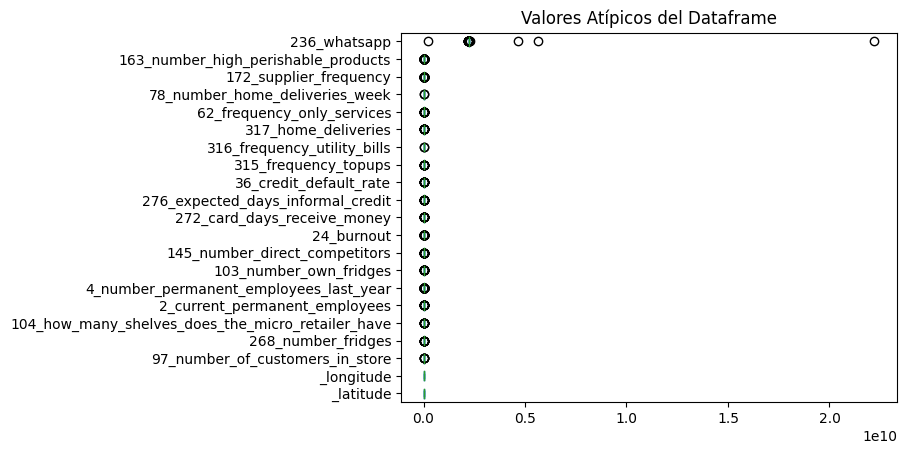

In [10]:
fig = plt.figure(figsize = (15, 8))
df.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

Para poder tratar los valores atípicos utilizaremos el método de "Método Desviación Estándar" en el cual se encuentran los valores extremos.

In [11]:
y=df
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.014851e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.337392e+01
4_number_permanent_employees_last_year               1.207390e+01
103_number_own_fridges                               6.265890e+00
145_number_direct_competitors                        1.212786e+01
24_burnout                                           6.836495e+00
272_card_days_receive_money                          2.355266e+00
276_expected_days_informal_credit                    2.932944e+01
36_credit_default_rate                               2.842697e+00
315_frequency_topups                                 1.694443e+01
316_frequency_utility_bills                       

Como siguiente paso obtenemos los datos, y convertimos los outliers en nulos en el Dataframe.

In [12]:
df= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head(20)

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,NaN,2.224182e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,3.5,0.0,10.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,NaN,2.224182e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,3.5,0.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
5,19.059560,-98.234010,0.0,1.0,2.0,1.0,1.0,1.0,2.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,NaN,2.224182e+09
6,19.059037,-98.233027,1.0,0.0,2.0,2.0,2.0,1.0,0.0,3.5,1.0,NaN,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
7,19.060707,-98.229818,0.0,2.0,12.0,0.0,0.0,1.0,6.0,3.5,1.0,7.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,NaN,2.224182e+09
8,19.059474,-98.225277,0.0,0.0,8.0,1.0,1.0,1.0,2.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
9,19.058883,-98.224213,0.0,1.0,5.0,1.0,1.0,1.0,1.0,3.5,1.0,NaN,1.0,3.5,28.5,2.0,2.0,2.0,2.0,5.0,2.224524e+09


Después lo que se realizó fue reemplazar los valores atípicos que se encuentran ahora como valores nulos con el promedio.

In [13]:
df = df.fillna(round(df.mean(),1))
df

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,3.0,2.224182e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,3.5,0.0,10.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,3.0,2.224182e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,3.5,0.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,0.0,2.224182e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
167,19.042794,-98.193802,1.0,5.0,5.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
168,19.042809,-98.193439,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
169,19.042558,-98.193818,0.0,1.0,1.0,1.0,1.0,1.0,3.0,3.5,1.0,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09


Comprobamos que no existan valores nulos después de utilizar el método de desviación estándar.

In [14]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

### Ahora para poder extraer características a partir de aplicar un análisis univariado, a diferentes variables **categóricas** mostraremos los resultados obtenidos, mediante gráficas y tablas y las interpretaremos pero antes generaremos una limpieza del dataset utilizando ahora únicamente las variables categóricas.

Hecho esto cargamos de nuevo el dataset que utilizaremos el cual tiene el nombre de microretailer_mit_lift_lab.xlsx, y también definimos una opción con pd.set_option para que nos muestre todas las columnas del dataset y así poder visualizar cuales son los atributos significantes.

In [15]:
df = pd.read_excel('/content/microretailer_mit_lift_lab.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

Después con el siguiente código eliminamos las filas que contengan valores cuantitativos.

In [16]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
df = df.drop(columns=numeric_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

Hecho esto observamos que existen diferentes variables/atributos que contienen una gran cantidad de valores nulos, y en variables cualitativa es importante que se debe definir de manera adecuada la forma de tratar los datos ya que de lo contrario puede afectar los resultados. Es por eso que los trataremos de dos formas diferentes. La primera forma es que los atributos que tienen menos de 60 valores nulos los llenaremos con la moda, mientras que los que tienen más de 60 valores nulos los rellenaremos con la palabra desconocido ya que al querer hacer un análisis si lo llenamos con moda al ser tantos, los datos no serán confiables.

In [17]:
for columna in df.columns:
    nulos_count = df[columna].isnull().sum()
    if nulos_count <= 60:
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
    else:
        df[columna].fillna('Desconocido', inplace=True)

Hecho esto comprobamos que ya no existan valores nulos

In [18]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

Visto que ya no contamos con ningún valor nulo en ningún atributo, imprimimos el data info y definimos que muestra cada variable para poder elegir los mejores 20 atributos a analizar.  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

In [20]:
df

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,Desconocido,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,Desconocido,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Redes sociales,no,Desconocido,Desconocido,Software especializado,no,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,no,Desconocido,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,no,Desconocido,Desconocido,Desconocido
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),Desconocido,yes,yes,2012-08-12,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,Desconocido,no,no,yes,WhatsApp,"Efectivo,Transferencia interbancaria",Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Aplicación móvil,no,Desconocido,Desconocido,Desconocido,no,Desconocido,Desconocido,De

### **Variables del dataframe:**

1. `_record_id`: Un identificador único para cada registro en el DataFrame.
2. `_title`: El título o nombre del registro.
3. `_server_updated_at`: La fecha y hora de la última actualización en el servidor.
4. `_updated_by`: El usuario que realizó la última actualización.
5. `_geometry`: Información relacionada con la geometría o ubicación de los registros.
6. `228_store_name`: El nombre de la tienda.
7. `229_store_picture`: Una imagen o foto de la tienda.
8. `232_type_of_store`: El tipo de tienda.
9. `108_does_the_micro_retailer_has_a_barred_window_`: Indica si el minorista tiene una ventana con rejas.
10. `99_does_the_micro_retailer_exhibits_products_outside_`: Indica si el minorista exhibe productos afuera de la tienda.
11. `102_does_the_micro_retailer_sells_fresh_products_`: Indica si el minorista vende productos frescos.
12. `184_store_devices`: Información sobre dispositivos en la tienda.
13. `pictures_of_shelves_if_possible`: Fotos de los estantes de la tienda, si están disponibles.
14. `hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz`: Un mensaje relacionado con estudiantes del Tec de Monterrey.
15. `le_comento_que_toda_esta_informacin_es_confidencial`: Un mensaje indicando que la información es confidencial.
16. `233_date_establishment`: La fecha de establecimiento de la tienda.
17. `5_change_store_space_last_year`: Cambios en el espacio de la tienda en el último año.
18. `6_change_employees_average_salary_last_year`: Cambios en el salario promedio de los empleados en el último año.
19. `20_reviews_finances_monthly`: Revisiones de las finanzas mensuales.
20. `49_inventory_records`: Registros de inventario.
21. `18_sales_records`: Registros de ventas.
22. `155_sales_registers_used_for`: Registros de ventas utilizados para algo en particular.
23. `19_tax_id`: El número de identificación fiscal de la tienda.
24. `310_burnout`: Información sobre el agotamiento o burnout.
25. `186_internet_connection`: Estado de la conexión a Internet.
26. `210_sales_channels`: Canales de ventas utilizados.
27. `189_payment_methods`: Métodos de pago aceptados por la tienda.
28. `28_prefered_payment_method`: Método de pago preferido.
29. `31_different_prices_payment_method`: Indica si se utilizan diferentes precios para métodos de pago.
30. `269_cash_discount`: Descuento por pago en efectivo.
31. `270_card_extra_charge`: Cargo adicional por tarjeta.
32. `30_payment_methods_large_purchases`: Métodos de pago para compras grandes.
33. `214_customer_relationship_tools`: Herramientas de gestión de relaciones con los clientes.
34. `33_credit_to_customers`: Crédito a los clientes.
35. `35_interest_rate`: Tasa de interés.
36. `38_average_margin_profits`: Margen de beneficio promedio.
37. `193_sales_planning_tools`: Herramientas de planificación de ventas.
38. `227_agreement_ecommerce_platforms`: Acuerdos con plataformas de comercio electrónico.
39. `60_services`: Servicios ofrecidos por la tienda.
40. `77_delivery_timeslots`: Franjas horarias de entrega.
41. `79_delivery_vehicle`: Vehículos de entrega.
42. `64_comission_services`: Comisiones por servicios.
43. `66_percentaje_services_income`: Porcentaje de ingresos por servicios.
44. `69_why_not_services`: Razones por las que no se ofrecen servicios.
45. `311_topups`: Recargas de saldo.
46. `312_payment_of_utilities`: Pago de servicios públicos.
47. `313_home_deliveries`: Entregas a domicilio.
48. `314_reception_delivery_packages`: Recepción de paquetes de entrega.
49. `42_willingness_share_inventory_data_suppliers`: Disposición a compartir datos de inventario con proveedores.
50. `44_willingness_inventory_management_suppliers`: Disposición a gestionar inventario con proveedores.
51. `45_willingness_reorder_suppliers`: Disposición a reordenar productos con proveedores.
52. `46_willingness_reorder_suppliers_variety`: Disposición a reordenar variedad de productos con proveedores.
53. `47_willingness_reorder_suppliers_lower_prices`: Disposición a reordenar con proveedores para obtener precios más bajos.
54. `43_willingness_share_sales_data_suppliers`: Disposición a compartir datos de ventas con proveedores.
55. `58_willingness_share_sales_data_mse`: Disposición a compartir datos de ventas con la MSE (Micro and Small Enterprises).
56. `59_willingness_share_sales_data_mse_better_prices`: Disposición a compartir datos de ventas con MSE para obtener mejores precios.
57. `185_place_orders_suppliers`: Colocación de pedidos con proveedores.
58. `53_special_conditions_suppliers`: Condiciones especiales con proveedores.
59. `278_credit_interest`: Intereses de crédito.
60. `192_procurement_planning_tools`: Herramientas de planificación de adquisiciones.
61. `277_payment_method_suppliers`: Métodos de pago para proveedores.
62. `56_procurement_changes_pandemic`: Cambios en la adquisición durante la pandemia.
63. `279_changes_procurement_pandemic`: Cambios en la adquisición debido a la pandemia.
64. `157_frequency_organize_shelves`: Frecuencia de organización de estantes.
65. `158_charact_organize_products_on_shelves`: Características de la organización de productos en estantes.
66. `161_actions_stockouts`: Acciones para abordar faltantes de stock.
67. `162_inventory_extra_space`: Espacio adicional de inventario.
68. `249_technology_training`: Capacitación en tecnología.
69. `250_technology_investment_operations`: Inversión en tecnología para operaciones.
70. `251_technology_investment_customers`: Inversión en tecnología para los clientes.
71. `254_technology_roadmap`: Hoja de ruta tecnológica.
72. `260_technology_scalable`: Tecnología escalable.
73. `261_technology_organization`: Organización tecnológica.
74. `262_technology_serve_customers`: Tecnología para servir a los clientes.
75. `263_technology_secure_sales`: Tecnología para asegurar ventas.
76. `264_technology_budget`: Presupuesto de tecnología.
77. `267_technology_investment_customer_preferences`: Inversión en tecnología basada en las preferencias del cliente.
78. `234_willingness_participate_workshop`: Disposición a participar en talleres.
79. `318_shopkeeper_name`: Nombre del tendero.
80. `319_shopkeepers_last_name`: Apellido del tendero.
81. `235_email`: Dirección de correo electrónico.

Observando las variables se seleccionaron las siguientes ya que podrían ser de interés para el análisis que se tiene que generar:

1. "title"
2. "232_type_of_store"
3. "108_does_the_micro_retailer_has_a_barred_window"
4. "102_does_the_micro_retailer_sells_fresh_products_"
5. "233_date_establishment"
6. "269_cash_discount"
7. "310_burnout"
8. "60_services"
9. "313_home_deliveries"
10. "278_credit_interest"
11. "235_email"
12. "185_place_orders_suppliers"
13. "58_willingness_share_sales_data_mse"
14. "260_technology_scalable"
15. "262_technology_serve_customers"
16. "319_shopkeepers_last_name"
17. "158_charact_organize_products_on_shelves"
18. "161_actions_stockouts"
19. "57_willingness_share_sales_data_mse_better_prices"
20. "34_33_credit_to_customers"

Definimos un código en el cual guardamos las 20 variables seleccionadas en una lista y después generamos un ciclo for para que con cada variable categórica se genere una gráfica de barras y una tabla de frecuencia de sus valores.

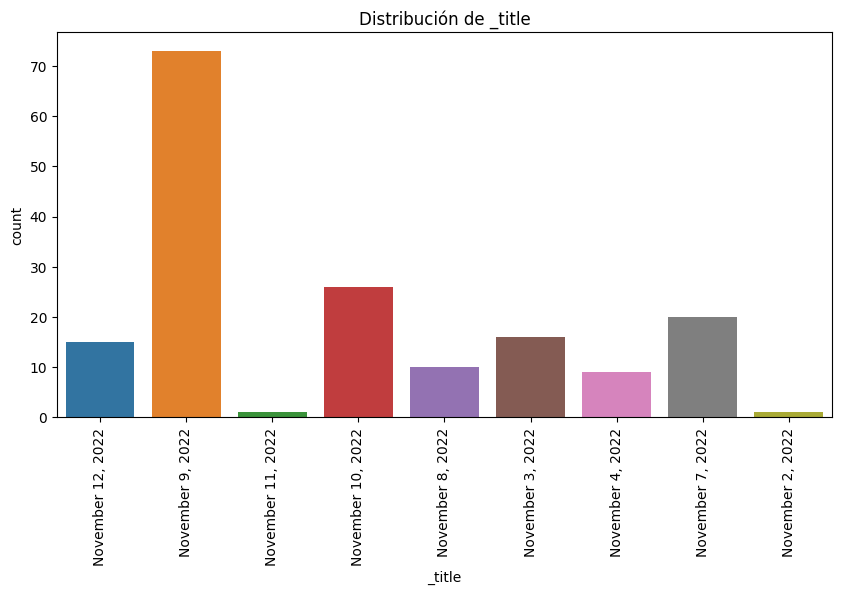

Tabla de frecuencias de _title:

November 9, 2022     73
November 10, 2022    26
November 7, 2022     20
November 3, 2022     16
November 12, 2022    15
November 8, 2022     10
November 4, 2022      9
November 11, 2022     1
November 2, 2022      1
Name: _title, dtype: int64





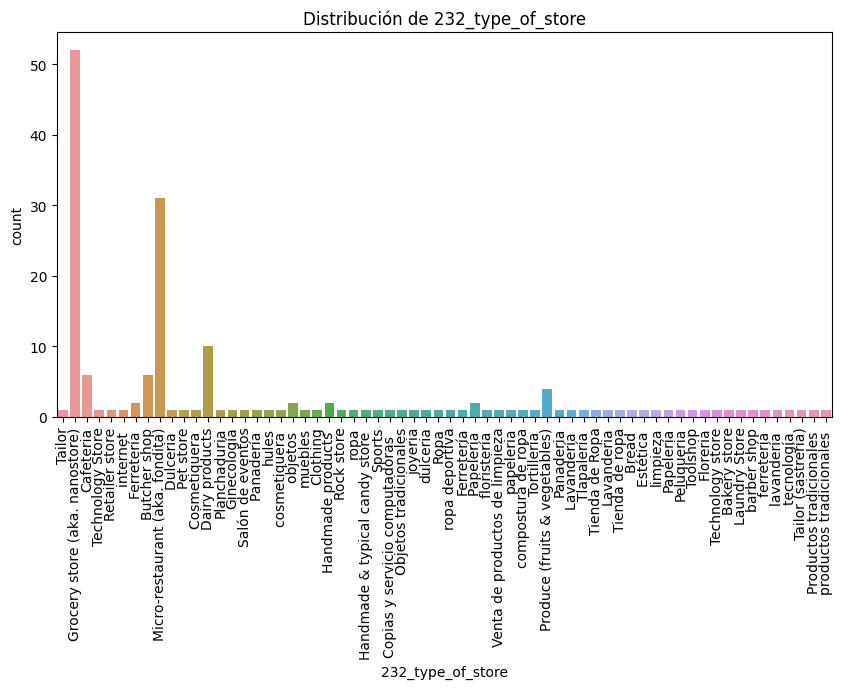

Tabla de frecuencias de 232_type_of_store:

Grocery store (aka. nanostore)     52
Micro-restaurant (aka. fondita)    31
Dairy products                     10
Cafeteria                           6
Butcher shop                        6
                                   ..
joyeria                             1
dulceria                            1
Ropa                                1
Ferretería                          1
productos tradicionales             1
Name: 232_type_of_store, Length: 64, dtype: int64





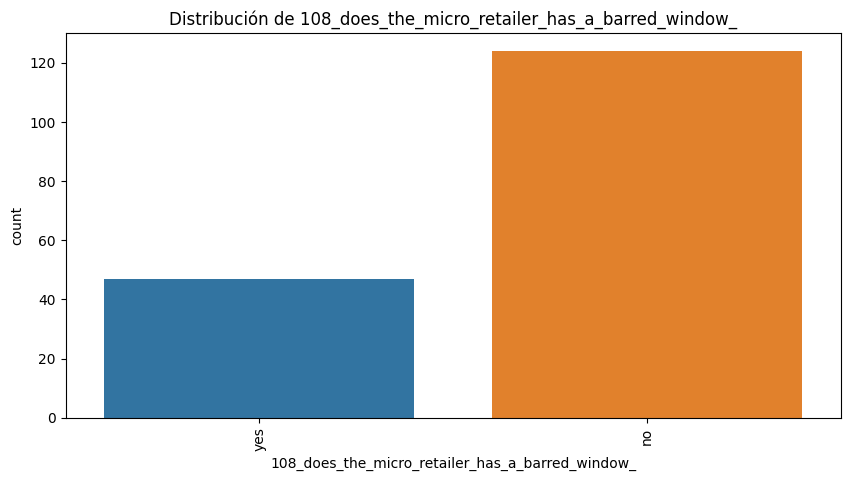

Tabla de frecuencias de 108_does_the_micro_retailer_has_a_barred_window_:

no     124
yes     47
Name: 108_does_the_micro_retailer_has_a_barred_window_, dtype: int64





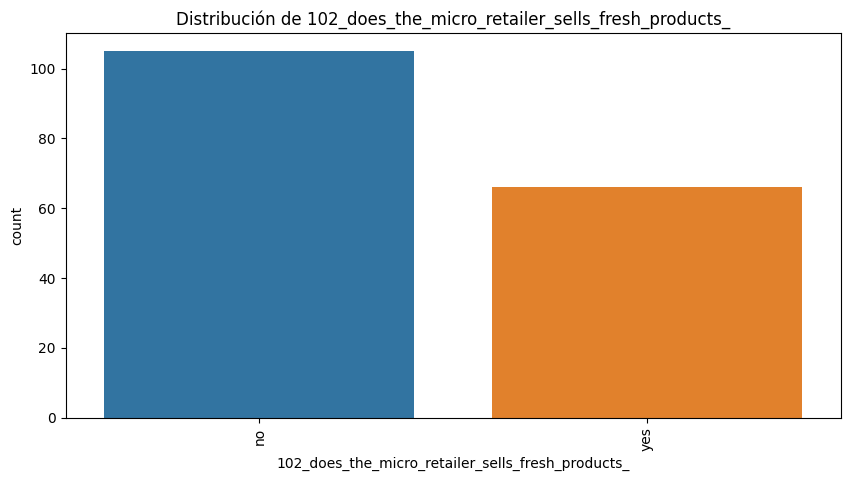

Tabla de frecuencias de 102_does_the_micro_retailer_sells_fresh_products_:

no     105
yes     66
Name: 102_does_the_micro_retailer_sells_fresh_products_, dtype: int64





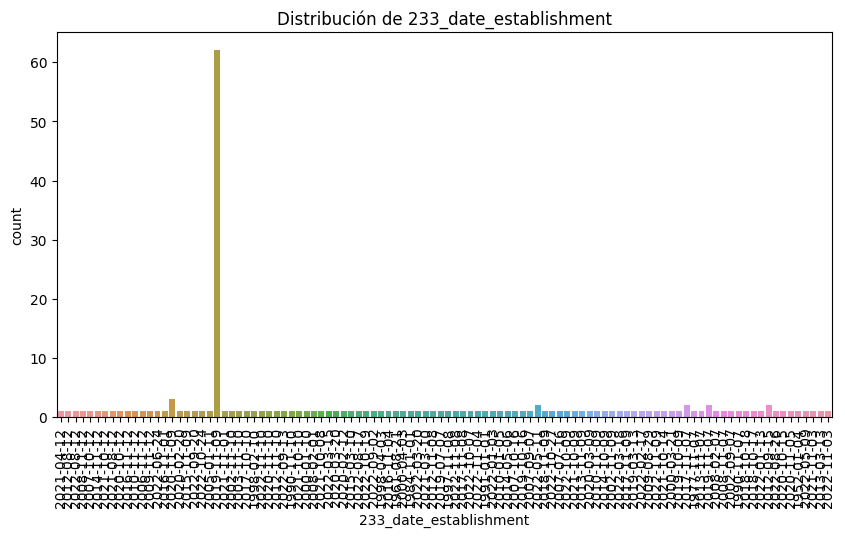

Tabla de frecuencias de 233_date_establishment:

2019-11-09    62
2020-11-09     3
2017-11-07     2
2012-09-15     2
2022-05-11     2
              ..
2000-01-10     1
2021-10-10     1
1990-11-10     1
2022-09-13     1
2022-11-03     1
Name: 233_date_establishment, Length: 104, dtype: int64





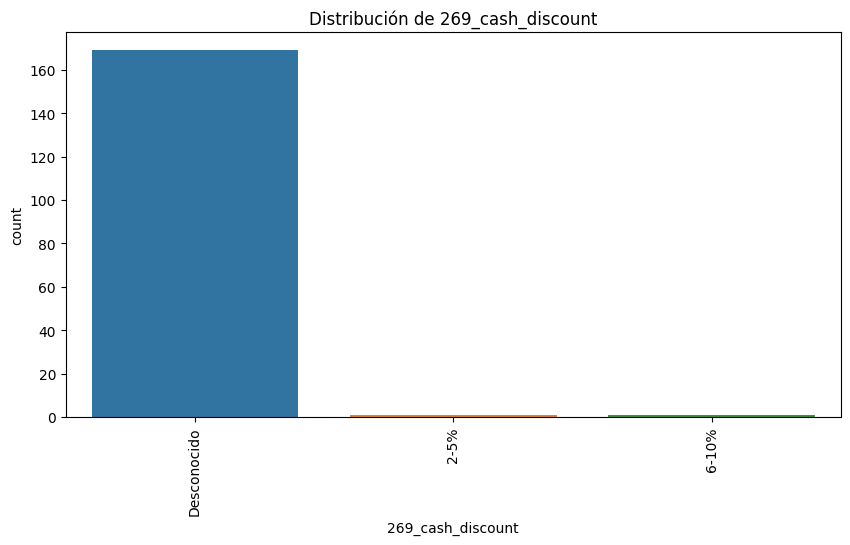

Tabla de frecuencias de 269_cash_discount:

Desconocido    169
2-5%             1
6-10%            1
Name: 269_cash_discount, dtype: int64





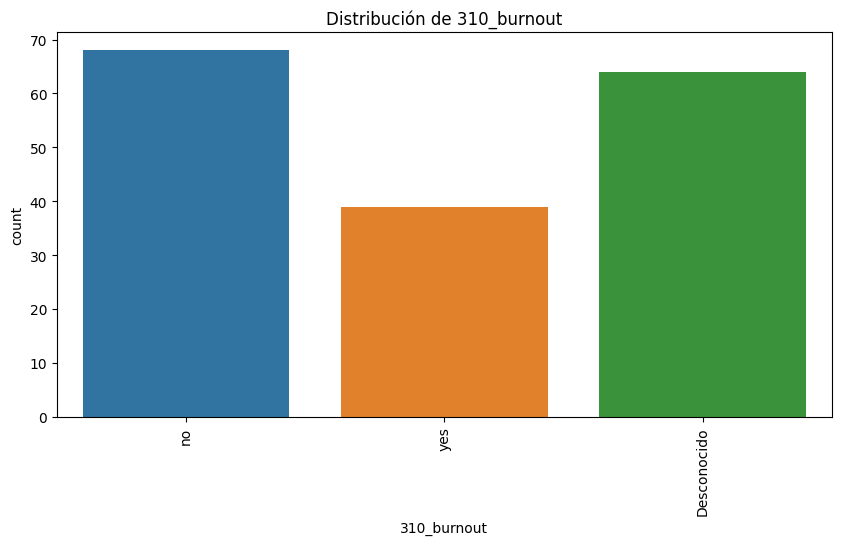

Tabla de frecuencias de 310_burnout:

no             68
Desconocido    64
yes            39
Name: 310_burnout, dtype: int64





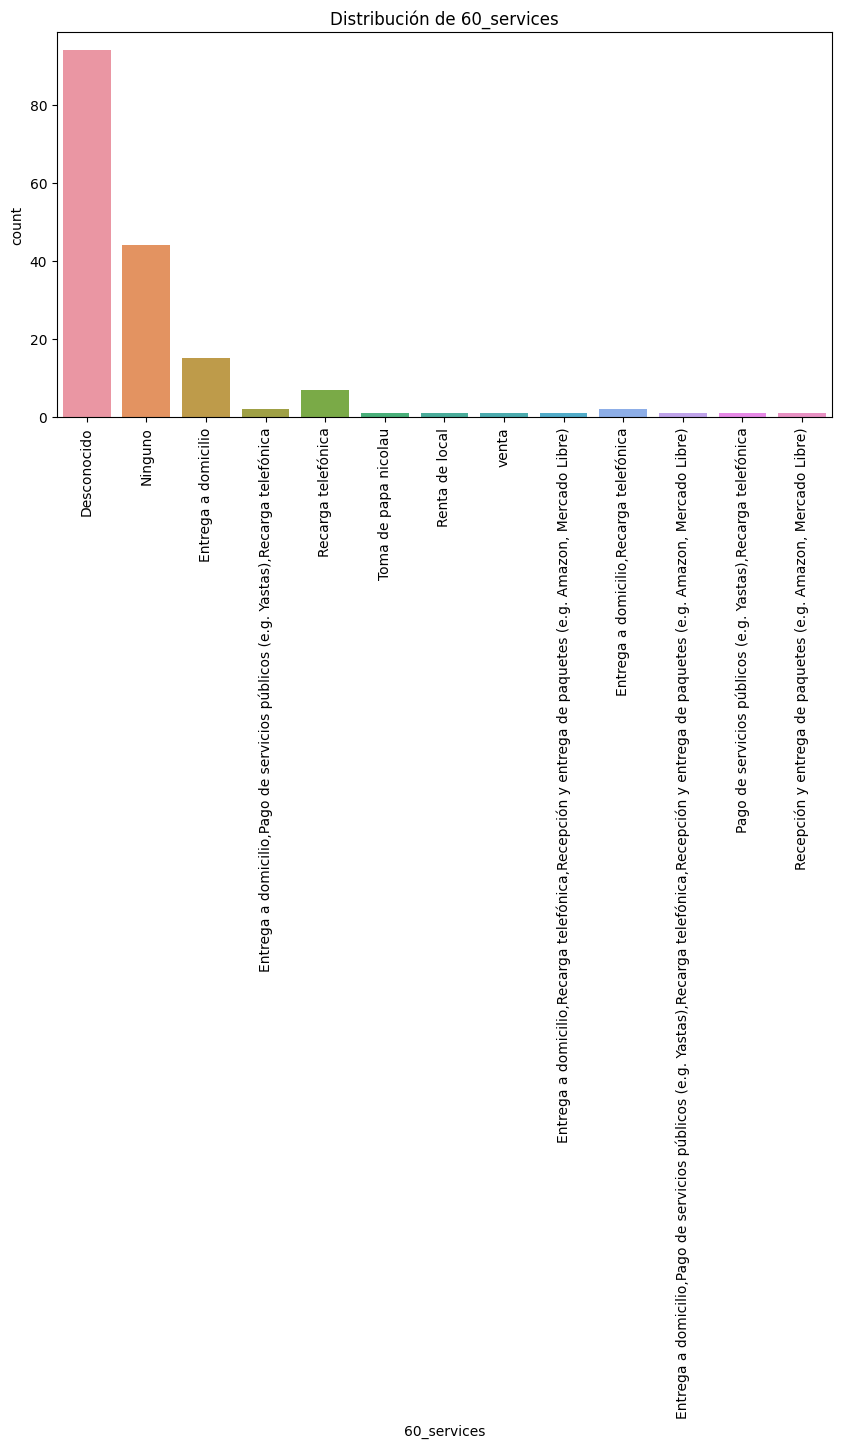

Tabla de frecuencias de 60_services:

Desconocido                                                                                                                                     94
Ninguno                                                                                                                                         44
Entrega a domicilio                                                                                                                             15
Recarga telefónica                                                                                                                               7
Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica                                                                  2
Entrega a domicilio,Recarga telefónica                                                                                                           2
Toma de papa nicolau                                                            

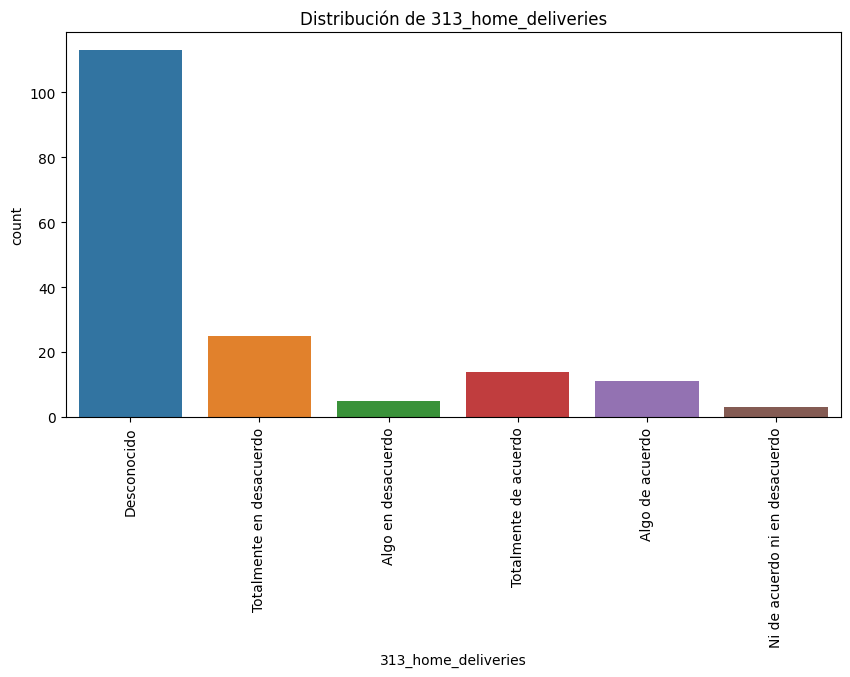

Tabla de frecuencias de 313_home_deliveries:

Desconocido                       113
Totalmente en desacuerdo           25
Totalmente de acuerdo              14
Algo de acuerdo                    11
Algo en desacuerdo                  5
Ni de acuerdo ni en desacuerdo      3
Name: 313_home_deliveries, dtype: int64





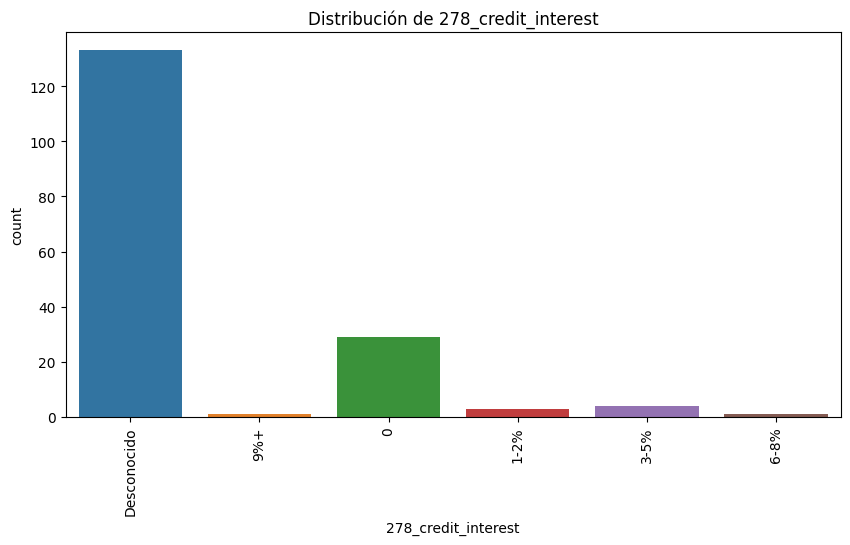

Tabla de frecuencias de 278_credit_interest:

Desconocido    133
0               29
3-5%             4
1-2%             3
9%+              1
6-8%             1
Name: 278_credit_interest, dtype: int64





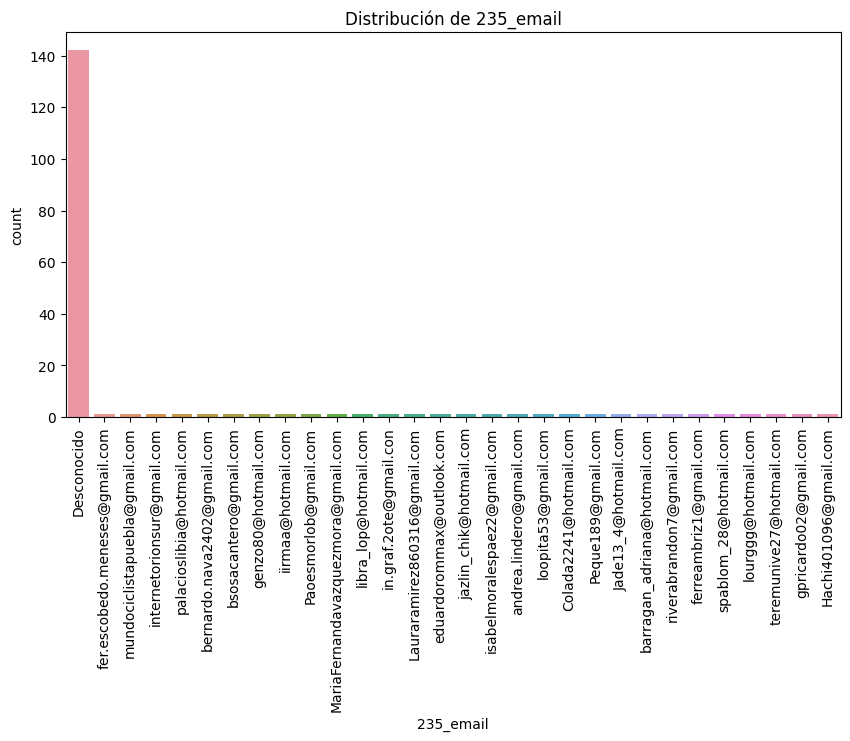

Tabla de frecuencias de 235_email:

Desconocido                           142
fer.escobedo.meneses@gmail.com          1
gpricardo02@gmail.com                   1
teremunive27@hotmail.com                1
lourggg@hotmail.com                     1
spablom_28@hotmail.com                  1
ferreambriz1@gmail.com                  1
riverabrandon7@gmail.com                1
barragan_adriana@hotmail.com            1
Jade13_4@hotmail.com                    1
Peque189@gmail.com                      1
Colada2241@hotmail.com                  1
loopita53@gmail.com                     1
andrea.lindero@gmail.com                1
isabelmoralespaez2@gmail.com            1
jazlin_chik@hotmail.com                 1
eduardorommax@outlook.com               1
Lauraramirez860316@gmail.com            1
in.graf.2ote@gmail.con                  1
libra_lop@hotmail.com                   1
MariaFernandavazquezmora@gmail.com      1
Paoesmorlob@gmail.com                   1
iirmaa@hotmail.com                      

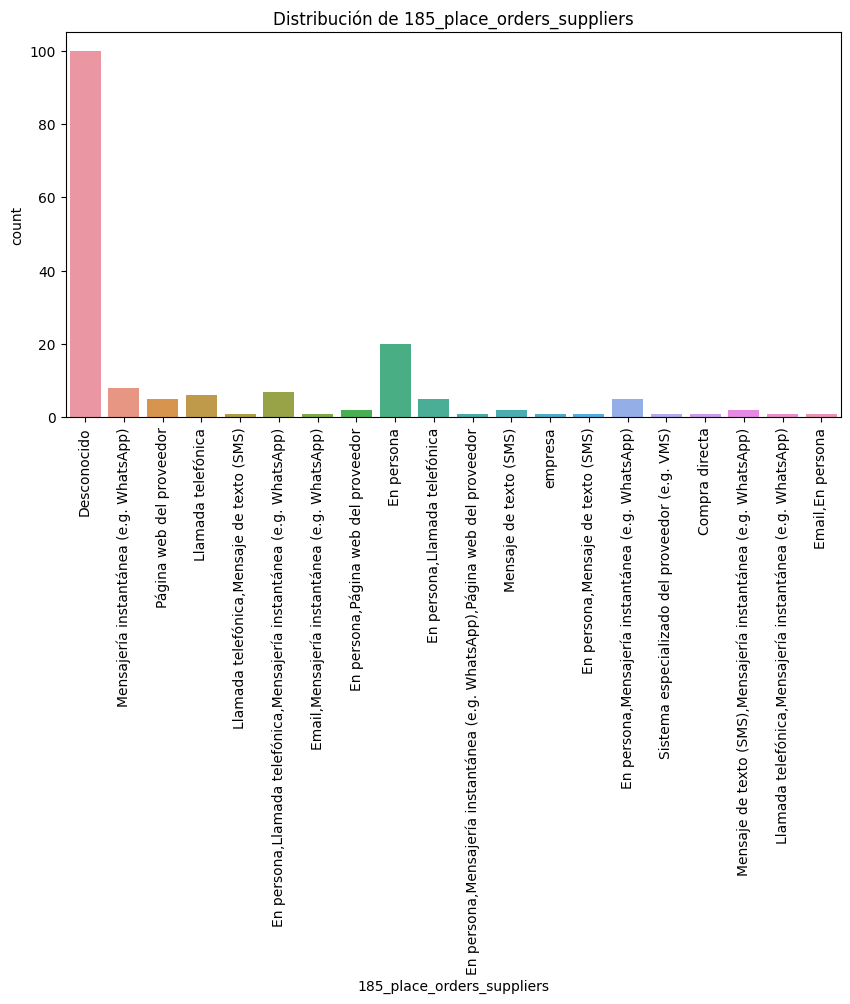

Tabla de frecuencias de 185_place_orders_suppliers:

Desconocido                                                                   100
En persona                                                                     20
Mensajería instantánea (e.g. WhatsApp)                                          8
En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)            7
Llamada telefónica                                                              6
En persona,Mensajería instantánea (e.g. WhatsApp)                               5
Página web del proveedor                                                        5
En persona,Llamada telefónica                                                   5
Mensaje de texto (SMS),Mensajería instantánea (e.g. WhatsApp)                   2
En persona,Página web del proveedor                                             2
Mensaje de texto (SMS)                                                          2
Llamada telefónica,Mensajería instantánea (e.

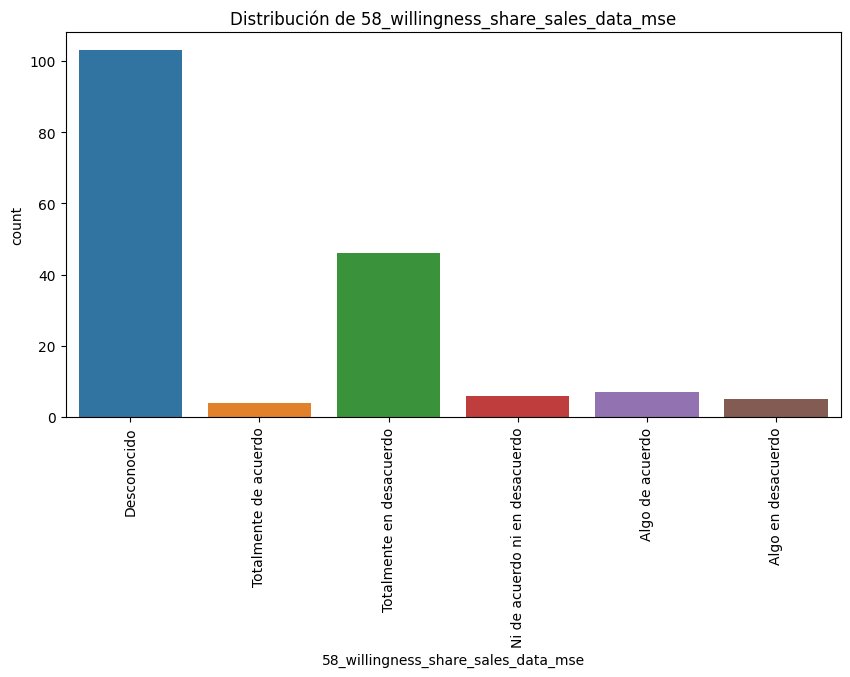

Tabla de frecuencias de 58_willingness_share_sales_data_mse:

Desconocido                       103
Totalmente en desacuerdo           46
Algo de acuerdo                     7
Ni de acuerdo ni en desacuerdo      6
Algo en desacuerdo                  5
Totalmente de acuerdo               4
Name: 58_willingness_share_sales_data_mse, dtype: int64





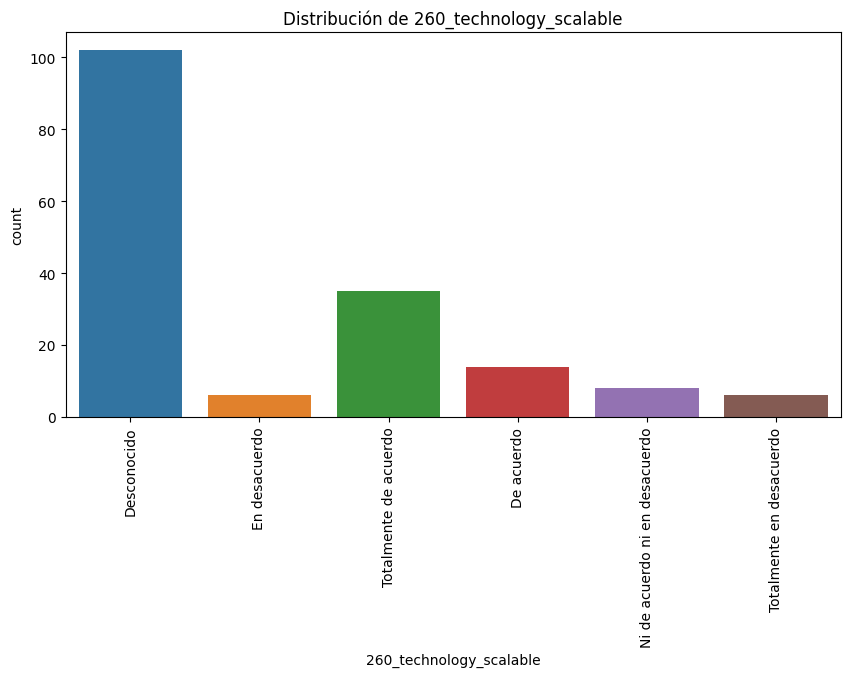

Tabla de frecuencias de 260_technology_scalable:

Desconocido                       102
Totalmente de acuerdo              35
De acuerdo                         14
Ni de acuerdo ni en desacuerdo      8
En desacuerdo                       6
Totalmente en desacuerdo            6
Name: 260_technology_scalable, dtype: int64





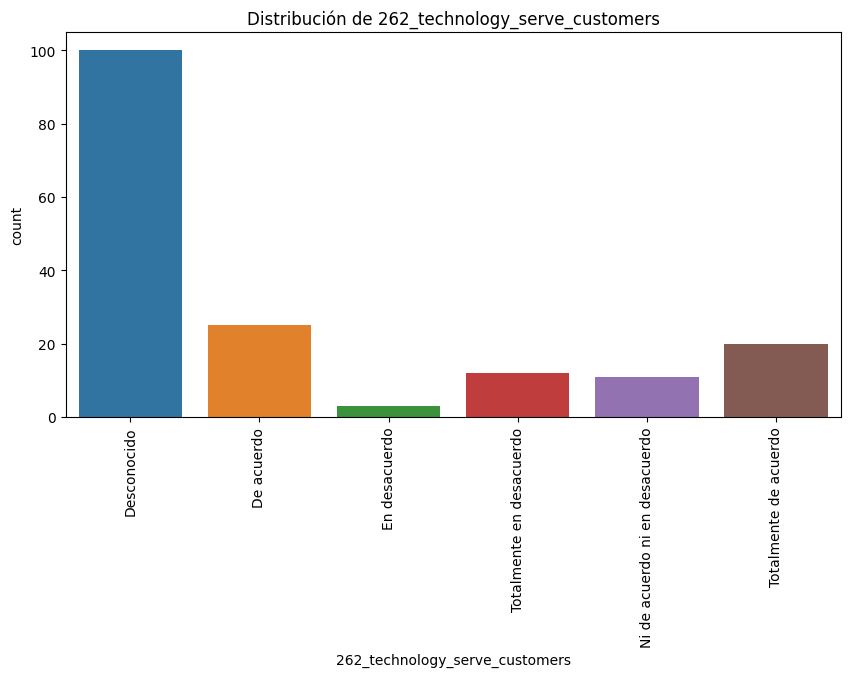

Tabla de frecuencias de 262_technology_serve_customers:

Desconocido                       100
De acuerdo                         25
Totalmente de acuerdo              20
Totalmente en desacuerdo           12
Ni de acuerdo ni en desacuerdo     11
En desacuerdo                       3
Name: 262_technology_serve_customers, dtype: int64





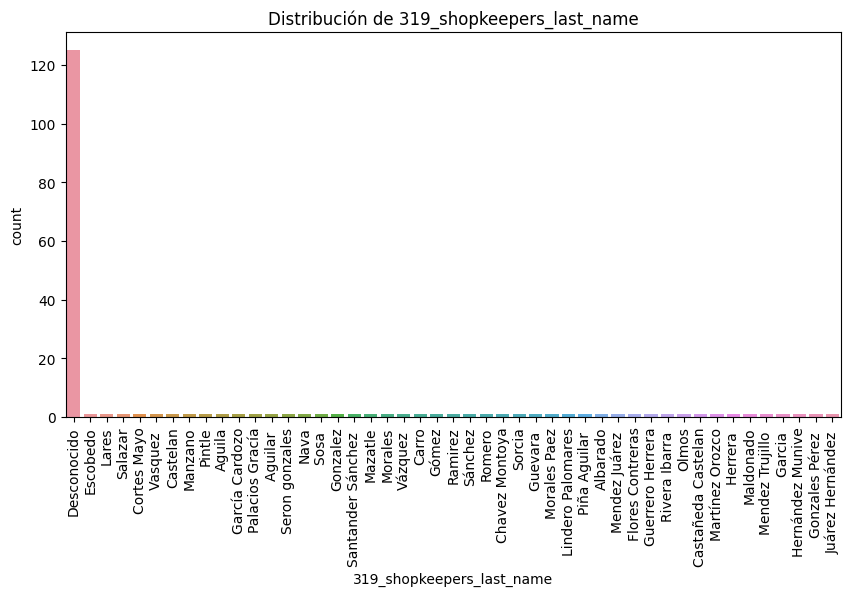

Tabla de frecuencias de 319_shopkeepers_last_name:

Desconocido           125
Guerrero Herrera        1
Chavez Montoya          1
Sorcia                  1
Guevara                 1
Morales Paez            1
Lindero Palomares       1
Piña Aguilar            1
Albarado                1
Mendez Juárez           1
Flores Contreras        1
Rivera Ibarra           1
Sánchez                 1
Olmos                   1
Castañeda Castelan      1
Martínez Orozco         1
Herrera                 1
Maldonado               1
Mendez Trujillo         1
Garcia                  1
Hernández Munive        1
Gonzales Pérez          1
Romero                  1
Ramirez                 1
Escobedo                1
Palacios Gracía         1
Lares                   1
Salazar                 1
Cortes Mayo             1
Vasquez                 1
Castelan                1
Manzano                 1
Pintle                  1
Aguila                  1
García Cardozo          1
Aguilar                 1
Gómez       

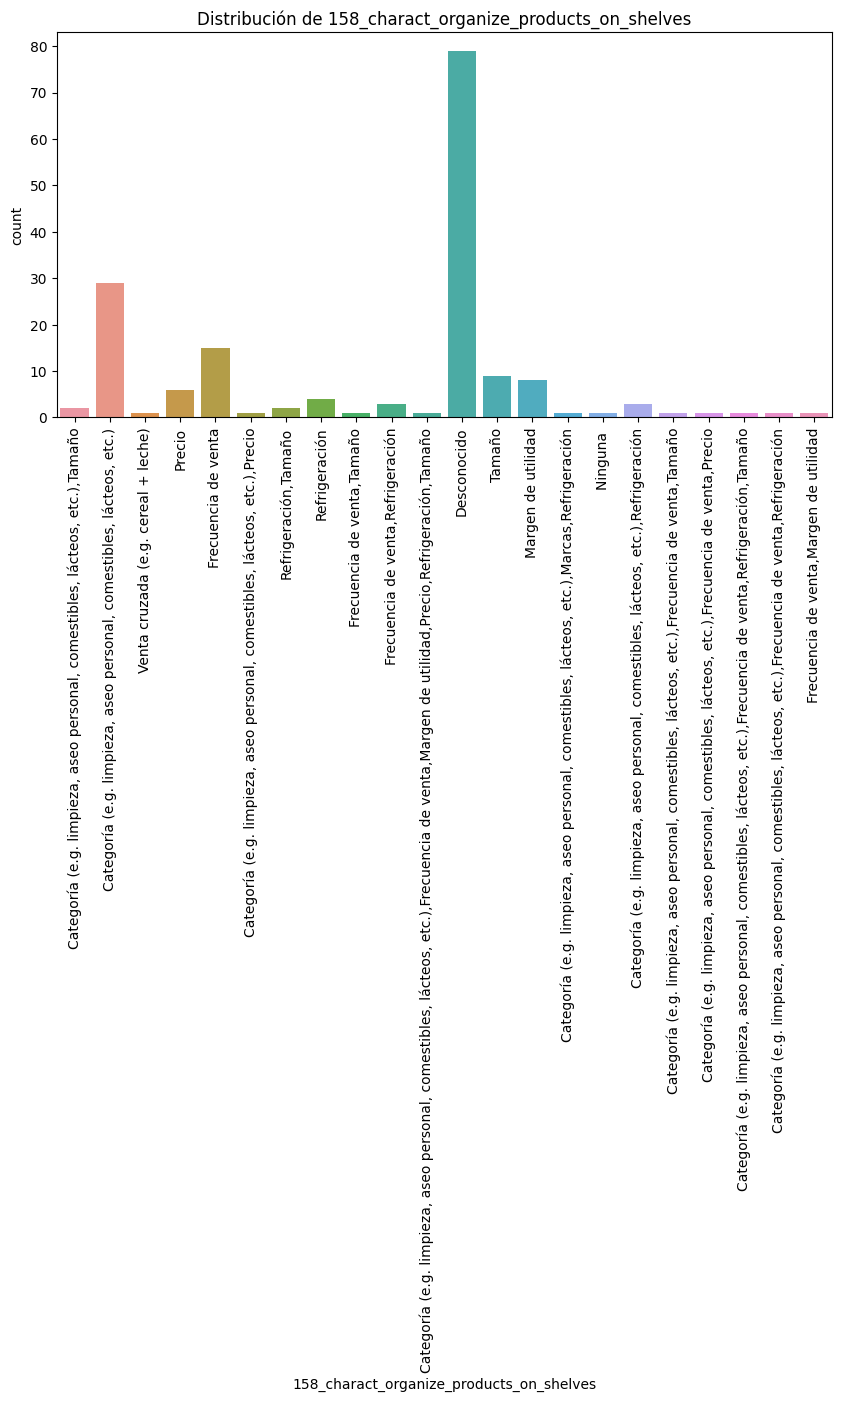

Tabla de frecuencias de 158_charact_organize_products_on_shelves:

Desconocido                                                                                                                                79
Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)                                                                       29
Frecuencia de venta                                                                                                                        15
Tamaño                                                                                                                                      9
Margen de utilidad                                                                                                                          8
Precio                                                                                                                                      6
Refrigeración                                                                    

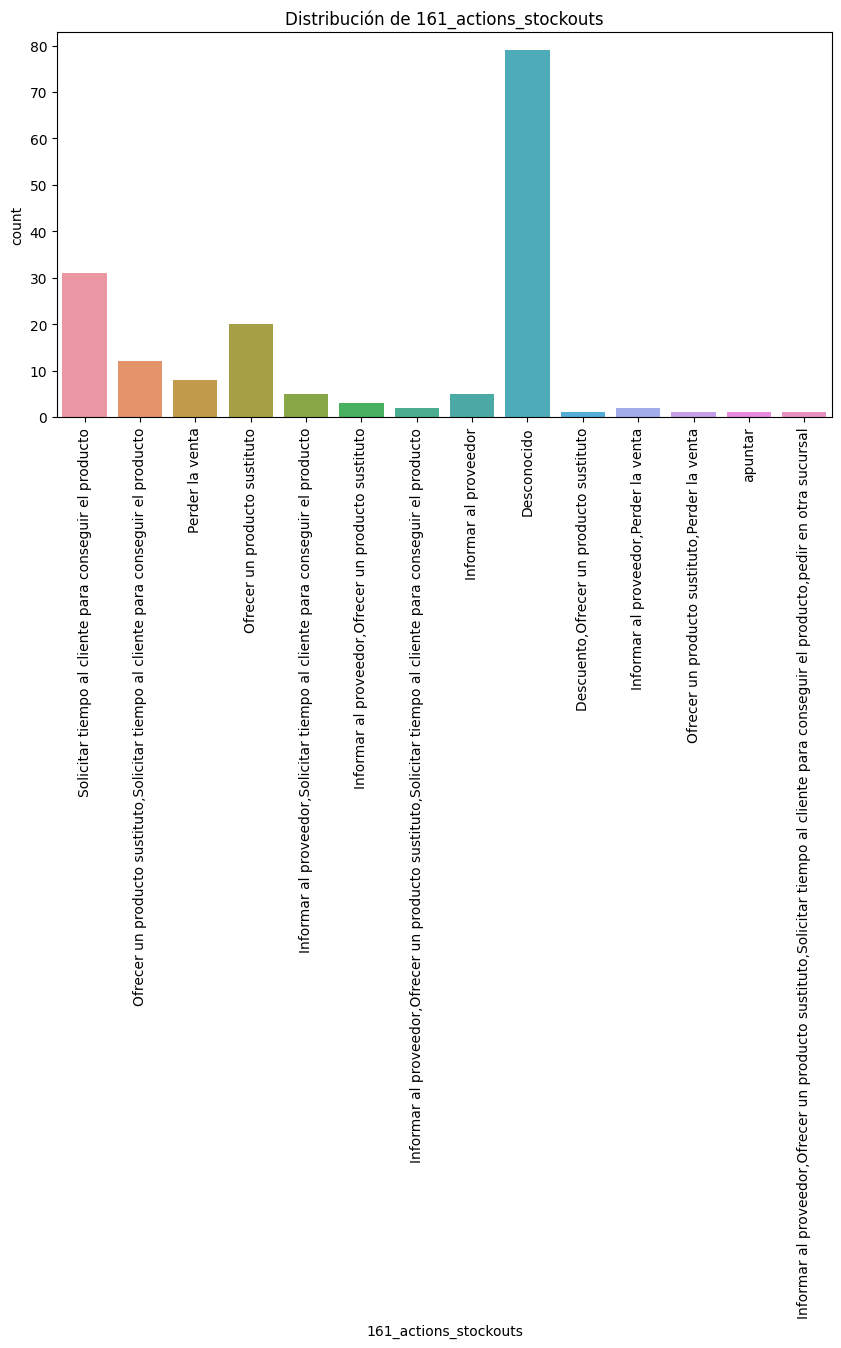

Tabla de frecuencias de 161_actions_stockouts:

Desconocido                                                                                                                          79
Solicitar tiempo al cliente para conseguir el producto                                                                               31
Ofrecer un producto sustituto                                                                                                        20
Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto                                                 12
Perder la venta                                                                                                                       8
Informar al proveedor,Solicitar tiempo al cliente para conseguir el producto                                                          5
Informar al proveedor                                                                                                                 5


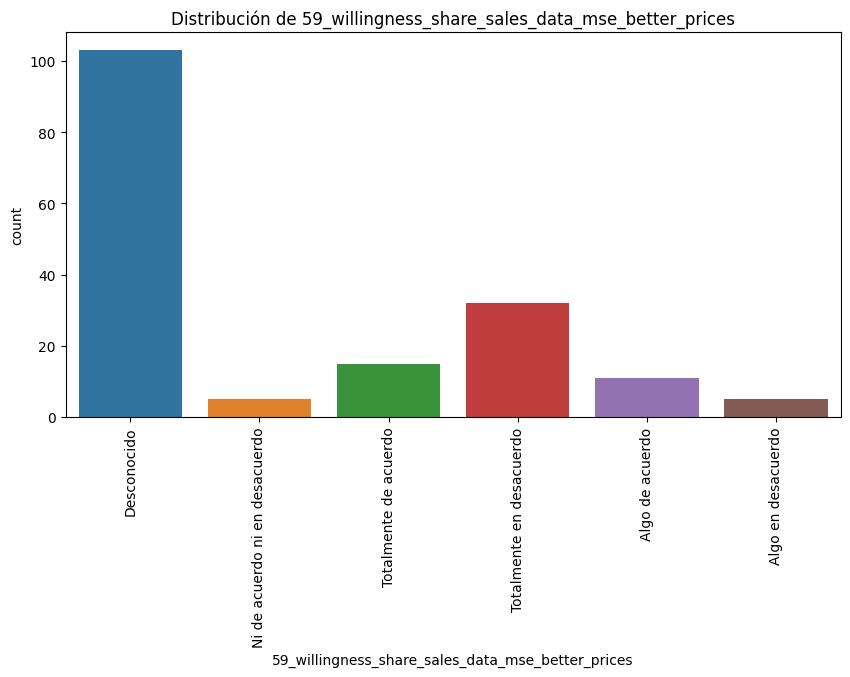

Tabla de frecuencias de 59_willingness_share_sales_data_mse_better_prices:

Desconocido                       103
Totalmente en desacuerdo           32
Totalmente de acuerdo              15
Algo de acuerdo                    11
Ni de acuerdo ni en desacuerdo      5
Algo en desacuerdo                  5
Name: 59_willingness_share_sales_data_mse_better_prices, dtype: int64





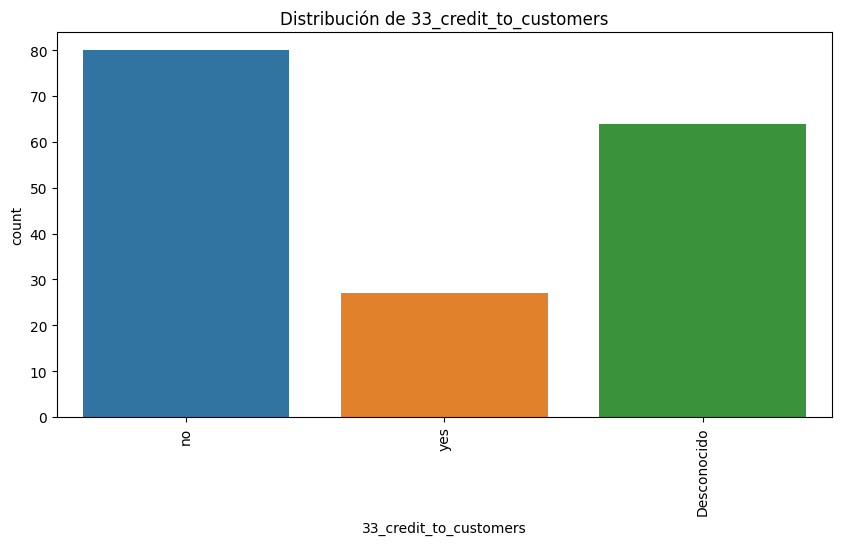

Tabla de frecuencias de 33_credit_to_customers:

no             80
Desconocido    64
yes            27
Name: 33_credit_to_customers, dtype: int64





In [21]:
variables = ["_title","232_type_of_store","108_does_the_micro_retailer_has_a_barred_window_",
    "102_does_the_micro_retailer_sells_fresh_products_","233_date_establishment",
    "269_cash_discount","310_burnout","60_services","313_home_deliveries",
    "278_credit_interest","235_email","185_place_orders_suppliers",
    "58_willingness_share_sales_data_mse","260_technology_scalable",
    "262_technology_serve_customers","319_shopkeepers_last_name",
    "158_charact_organize_products_on_shelves","161_actions_stockouts",
    "59_willingness_share_sales_data_mse_better_prices",
    "33_credit_to_customers"]

for variable in variables:
    value_counts = df[variable].value_counts()
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=variable)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=90)
    plt.show()
    print(f"Tabla de frecuencias de {variable}:\n")
    print(value_counts)
    print("\n\n")


Interpretación

In [22]:
%%shell
jupyter nbconvert --to html /content/Actividad_4_Regresión_Lineal_Simple.ipynb

[NbConvertApp] WARNING | pattern '/content/Actividad_4_Regresión_Lineal_Simple.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterA

CalledProcessError: ignored